In [50]:
from PIL import Image  # Python Imaging Library
import numpy as np

In [51]:
inicjaly = Image.open("bs.bmp")  # wczytywanie obrazu

print("tryb", inicjaly.mode)
print("format", inicjaly.format)
print("rozmiar", inicjaly.size)

t_inicjaly = np.asarray(inicjaly)
print("typ danych tablicy", t_inicjaly.dtype)  # typ danych przechowywanych w tablicy
print("rozmiar tablicy", t_inicjaly.shape)  # rozmiar tablicy - warto porównac z wymiarami obrazka



tryb 1
format BMP
rozmiar (100, 50)
typ danych tablicy bool
rozmiar tablicy (50, 100)


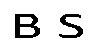

In [52]:
inicjaly
# inicjaly.show()

In [53]:
def rysuj_paski_w_obrazie(obraz, grub):  # rysuje pionowy pas grubości grub po lewej stronie oraz po prawej stronie
    tab_obraz = np.asarray(obraz).astype(np.uint8)  # wczytanie tablicy obrazu i zamiana na int
    h, w = tab_obraz.shape
    for i in range(h):
        for j in range(grub):
            tab_obraz[i][j] = 0
        for j in range(w - grub, w):
            tab_obraz[i][j] = 0
    tab = tab_obraz.astype(bool)  # zapisanie tablicy w typie bool (obrazy czarnobiałe)
    return Image.fromarray(tab)


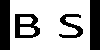

In [54]:
rysuj_paski_w_obrazie(inicjaly, 10)

In [55]:
def rysuj_ramke(w, h, grub):  # grub grubość ramki w pikselach
    t = (h, w)  # rozmiar tablicy
    tab = np.ones(t, dtype=np.uint8)  # deklaracja tablicy wypełnionej zerami - czarna
    tab[
        grub:h - grub, grub:w - grub] = 0  # skrócona wersja ustawienia wartości dla prostokatnego fragmentu tablicy [zakresy wysokości, zakresy szerokości] tablicy
    tab1 = tab.astype(np.bool_)
    return Image.fromarray(tab1)

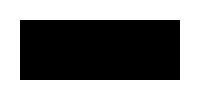

In [56]:
rysuj_ramke(200, 100, 20)

In [57]:
def rysuj_pasy_poziome(w, h, grub):  # w, h   -  rozmiar obrazu
    t = (h, w)  # rozmiar tablicy
    tab = np.ones(t, dtype=np.uint8)
    # jaki bedzie efekt, gdy np.ones zamienimy na np.zeros?
    ile = int(h / grub)  # liczba pasów  o grubości grub
    for k in range(ile):  # uwaga k = 0,1,2..   bez ile
        for g in range(grub):
            i = k * grub + g  # i - indeks wiersza, j - indeks kolumny
            for j in range(w):
                tab[i, j] = k % 2  # reszta z dzielenia przez dwa
    tab = tab * 255  # alternatywny sposób uzyskania tablicy obrazu czarnobiałego ale w trybie odcieni szarości
    return Image.fromarray(tab)  # tworzy obraz


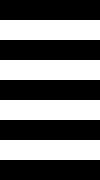

In [58]:
rysuj_pasy_poziome(100, 180, 20)

In [59]:
def wstaw_obraz(w, h, m, n, obraz):  # w,h rozmiary nowego obrazu, m<=w,  n<=h (m,n miejsce wstawienia obrazu )
    tab_obraz = np.asarray(obraz).astype(np.int_)
    h0, w0 = tab_obraz.shape
    t = (h, w)  # rozmiar tablicy nowego obrazu
    tab = np.zeros(t, dtype=np.uint8)  # deklaracja tablicy wypełnionej zerami - czarna
    n_k = min(h, n + h0)  # jesli wstawiany obraz wychodzi poza ramy nowego obrazu, to przycinamy
    m_k = min(w, m + w0)  # jesli wstawiany obraz wychodzi poza ramy nowego obrazu, to przycinamy
    n_p = max(0, n)  # jesli miejsce wstawienia jest ujemne(wychodzi poza nowy obraz w górę), to przycinamy
    m_p = max(0, m)  # jesli miejsce wstawienia jest ujemne(wychodzi poza nowy obraz w lewo), to przycinamy
    for i in range(n_p, n_k):
        for j in range(m_p, m_k):
            tab[i][j] = tab_obraz[i - n][j - m]
    tab = tab.astype(bool)  # zapisanie tablicy w typie bool (obrazy czarnobiałe)
    return Image.fromarray(tab)


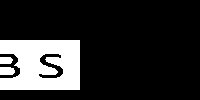

In [60]:
wstaw_obraz(200, 100, -20, 40, inicjaly)

1. Napisz funkcję rysuj_ramke_w_obrazie(obraz, grub)
    1. której argumentami są
        1. obraz # obraz jest w trybie ‘ 1 ’
       2grubość ramki grub
    2. która działa następująco
        1. wczytuje tablicę obrazu obraz w typie danych uint8
        2. zmienia wartości elementów w ramce na brzegu obrazu tak, żeby powstała czarna ramka grubości grub
        3. zamienia typ tablicy na bool i tworzy nowy obraz czarno-biały (w trybie ‘1’).
    3. Wskazówka: wykorzystaj funkcję rysuj_paski_w_obrazie(obraz, grub)

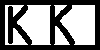

In [61]:
def rysuj_ramke_w_obrazie(obraz, grub):
    tablica_obrazu = np.asarray(obraz, dtype='uint8')
    h, w = tablica_obrazu.shape
    tablica_obrazu[0:h, 0:grub] = 0  # lewy
    tablica_obrazu[0:h, w - grub:w] = 0  # prawy
    tablica_obrazu[0:grub, 0:w] = 0  # gorny
    tablica_obrazu[h - grub:h, 0:w] = 0  # dolny
    wynik = tablica_obrazu.astype(bool)
    return Image.fromarray(wynik)


obrazek = Image.open("inicjaly.bmp")
rysuj_ramke_w_obrazie(obrazek, 5)

2. Napisz funkcje (dla każdego podpunktu oddzielnie), które dla podanych 𝑤 , ℎ tworzą obrazy o wymiarach
𝑤 × ℎ, następująco:
    1. rysuj_ramki(w,h,grub) - obraz na wyjściu ma na przemian czarną i białą
ramkę grubości 𝑔𝑟𝑢𝑏 licząc od zewnętrznych krawędzi obrazu
    2. rysuj_pasy_pionowe(w,h,grub) - obraz na wyjściu ma pionowe pasy
grubości 𝑔𝑟𝑢𝑏 zaczynając od czarnego od lewej
    3. rysuj_wlasne(w,h, ?) - spełnia wymagania własne autora (wymagania trzeba wcześniej opisać)

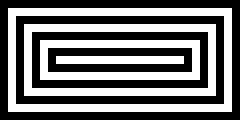

In [65]:
def rysuj_ramki(w, h, grub):
    t = (h, w)
    tab = np.ones(t, dtype=np.uint8)  # białe tło
    k = 0
    ile = int(min(w, h) / (2 * grub))
    for i in range(ile):
        lewo = i * grub
        prawo = w - i * grub
        gora = i * grub
        dol = h - i * grub

        tab[gora:gora + grub, lewo:prawo] = k % 2  # gora
        tab[dol - grub:dol, lewo:prawo] = k % 2  # dol
        tab[gora:dol, lewo:lewo + grub] = k % 2  # lewo
        tab[gora:dol, prawo - grub:prawo] = k % 2  # prawo
        k += 1

    tab_bool = tab.astype(bool)
    return Image.fromarray(tab_bool)


rysuj_ramki(240, 120, 8)

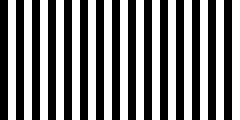

In [63]:
def rysuj_pasy_pionowe(w, h, grub):
    t = (h, w)
    tab = np.ones(t, dtype=np.uint8)
    k = 0
    ile = int(w / 2 * grub)
    for i in range(ile):
        lewo = i * grub
        tab[0:h, lewo:lewo + grub] = k % 2
        k += 1
    tab_bool = tab.astype(bool)
    return Image.fromarray(tab_bool)


rysuj_pasy_pionowe(240, 120, 8)

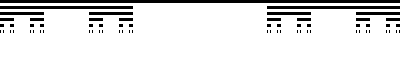

In [67]:
def rysuj_wlasne(w, h, grub, iteracje):
    """
    Rysuje zbiór Cantora.
    w, h        - wymiary obrazu
    grub        - grubość odcinków (piksele)
    iteracje    - liczba poziomów (iteracji)
    """
    tab = np.ones((h, w), dtype=np.uint8)
    segmenty = [(0, w, 0, iteracje)]

    while segmenty:
        lewo, prawo, y, poziom = segmenty.pop(0)

        if poziom == 0 or y >= h:
            continue

        tab[y:y + grub, lewo:prawo] = 0
        trzeci = (prawo - lewo) // 3
        nowy_y = y + 2 * grub
        if poziom > 1:
            segmenty.append((lewo, lewo + trzeci, nowy_y, poziom - 1))
            segmenty.append((prawo - trzeci, prawo, nowy_y, poziom - 1))

    tab_bool = tab.astype(bool)
    return Image.fromarray(tab_bool)


rysuj_wlasne(400, 80, 3, 8)

3. Modyfikując funkcję wstaw_obraz(w, h, m, n, obraz) napisz funkcję
wstaw_obraz_w_obraz(obraz_bazowy, obraz_wstawiany, m, n), która w miejscu m, n obrazu_bazowego
wstawia obraz_wstawiany (wraz z tłem)

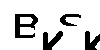

In [68]:
def wstaw_obraz_w_obraz(obraz_bazowy, obraz_wstawiany, m, n):
    tab_bazowy = np.asarray(obraz_bazowy).astype(np.uint8)
    tab_wstawiany = np.asarray(obraz_wstawiany).astype(np.uint8)

    h_b, w_b = tab_bazowy.shape
    h_w, w_w = tab_wstawiany.shape

    # Wyznaczanie obszaru wstawienia (przycinamy, jeśli wychodzi poza granice)
    n_k = min(h_b, n + h_w)
    m_k = min(w_b, m + w_w)
    n_p = max(0, n)
    m_p = max(0, m)

    for i in range(n_p, n_k):
        for j in range(m_p, m_k):
            tab_bazowy[i, j] = tab_wstawiany[i - n, j - m]
    tab_bool = tab_bazowy.astype(bool)
    return Image.fromarray(tab_bool)


obrazek1 = Image.open('bs.bmp')
obrazek2 = Image.open('inicjaly.bmp')
wstaw_obraz_w_obraz(obrazek1, obrazek2, 35, 26)